In [1]:
%matplotlib inline

In [2]:
!pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


Shape: (698, 19)
Columns: ['_id', 'city', 'aqi', 'pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2', 'nh3', 'ingestion_time', 'lat', 'lon', 'timestamp', 'hour', 'day', 'month', 'day_of_week', 'source']

First few rows:
                        _id    city  aqi   pm2_5    pm10       co    no2  \
0  6988c5e41b2031decbcb0fda  Lahore    5  101.21  160.45   584.25   2.44   
1  6988c6f51a0fb45bae00715b  Lahore    5  101.45  145.31   952.12  18.45   
2  6988c7dd5420300382dd3c70  Lahore    5  208.48  245.39  1442.67  19.14   
3  6988c7dd5420300382dd3c71  Lahore    5  227.24  269.99  1621.66  22.34   
4  6988c7dd5420300382dd3c72  Lahore    5  249.66  298.87  1813.77  24.15   

       o3   so2    nh3          ingestion_time      lat      lon  \
0  144.99  5.02  15.98 2026-02-08 17:20:36.503      NaN      NaN   
1   66.97  4.00  81.76 2026-02-08 17:25:09.493  31.5497  74.3436   
2   67.87  5.05  10.20 2026-02-08 17:29:01.944  31.5497  74.3436   
3   55.68  5.09  10.81 2026-02-08 17:29:01.944  31.5497  74.3

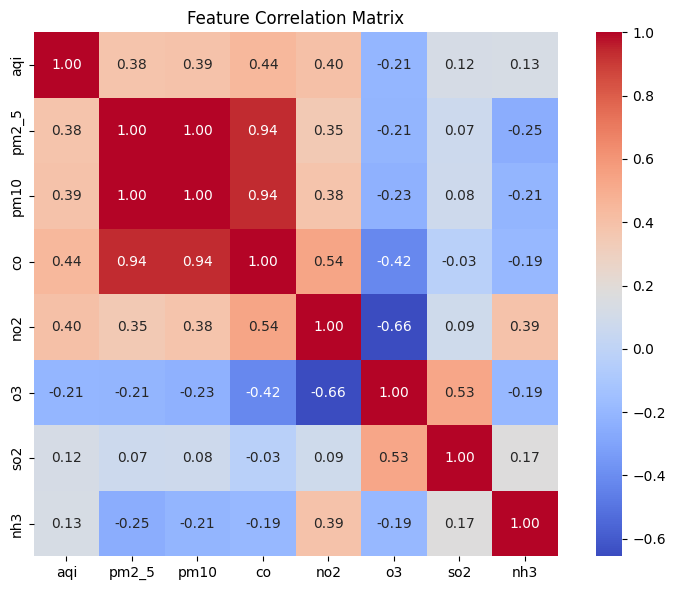

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt  # You were missing this import
import seaborn as sns
from pymongo import MongoClient
from dotenv import load_dotenv

load_dotenv()

MONGO_URI = os.getenv("MONGODB_URI")
DB_NAME = os.getenv("MONGODB_DB")
COLLECTION = os.getenv("MONGODB_COLLECTION")

client = MongoClient(MONGO_URI)
df = pd.DataFrame(list(client[DB_NAME][COLLECTION].find()))

print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())

features = ["aqi", "pm2_5", "pm10", "co", "no2", "o3", "so2", "nh3"]

# Check which features exist in your dataframe
available_features = [f for f in features if f in df.columns]
print(f"\nAvailable features: {available_features}")

if available_features:
    corr = df[available_features].corr()
    
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f', square=True)
    plt.title("Feature Correlation Matrix")
    plt.tight_layout()
    plt.show()
else:
    print("No matching features found in the dataframe!")